## Housing Price Prediction
#### Authors: Dylan Maray, Raymond Pepper, Sophia Sieli, Stephanie Dong, Madeline Groth, Nancy Huang

**Note:** ChatGPT was used to to check logic in code, debug code and edit syntax. 

Here we upload the dataset.

In [5]:
import os
import pandas as pd

os.chdir("/Users/dylanmaray/Desktop/AMS 325 - final/") # Change working directory to the folder I set my working directory to. 
data_dir = "/Users/dylanmaray/Desktop/AMS 325 - final/"
housing = pd.read_csv("housing.csv")
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Next week check for missing values

In [7]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Observe that the following dataset is not missing any values. Next we want to check the summary of this data set. 

In [9]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Here we want a general graph to see the overall plot of the real estate prices. 

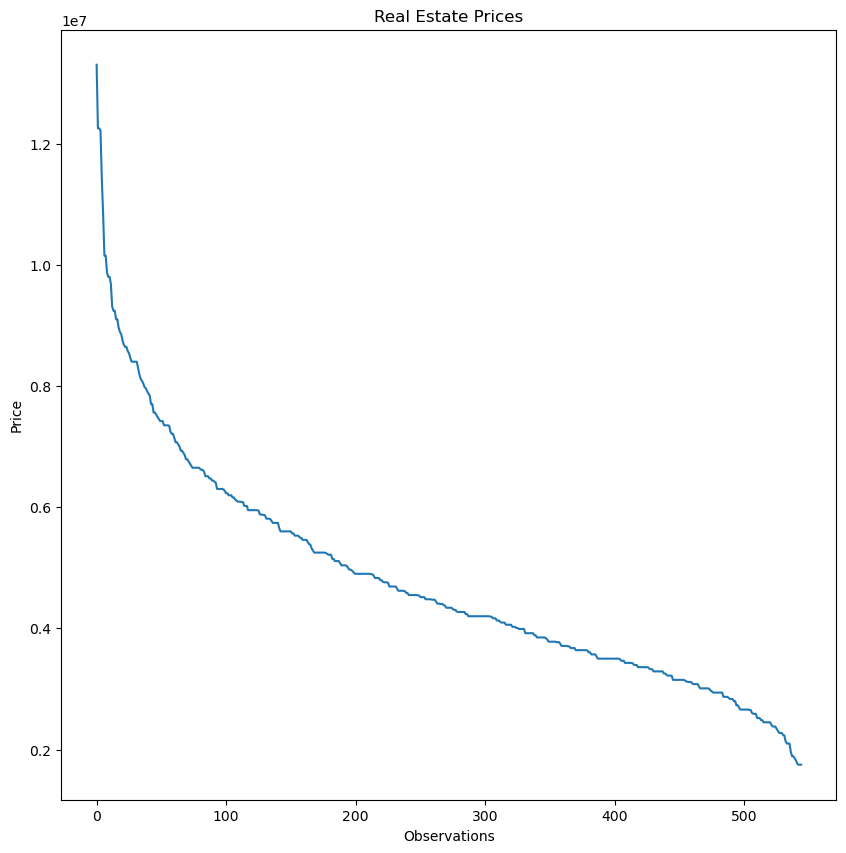

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 10))
plt.plot(housing['price'])
plt.xlabel('Observations')
plt.ylabel('Price')
plt.title('Real Estate Prices')
plt.show()

In this dataset, there is one dependent variable which is the price of the houses and 12 independent variable in which 5 are quantitative and 7 are categorical variables. The quantitative variables are the area of the home, the number of bedrooms, the number of bathrooms, the number of stories, the number of parking spaces. The categorical variables are whether or not a house has a mainroad, guestroom, basement, hot water heating, air conditioning and also whether the house is in a preferred area, and the furnishing status of the home. <br>

In the case of this dataset, the categorical variable furnished status would cause large levels of variation in the home prices. Thus, we would work with furnished homes.  

By inspection, there are no negative or zero entries for any of the variables.  

Above is the graph of all house prices within the furnished category.

Now to we just need to encode the remaining categorical variables so that we can apply these variables to the linear regression model. The remaining categorical variables have binary outcomes: (yes / no). Doing so introduces multicollinearity. Later, we will explore how to deal with this issue. 

In [15]:
bi_categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in bi_categorical: 
    housing[col] = housing[col].map({'yes': 1, 'no': 0})

In [16]:
predictors = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] + bi_categorical

Here want to check if the encoding work. Based on the output diagram below, the encoding was successful. 

In [18]:
housing[predictors] = housing[predictors].apply(pd.to_numeric)
housing[predictors]

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,7420,4,2,3,2,1,0,0,0,1,1
1,8960,4,4,4,3,1,0,0,0,1,0
2,9960,3,2,2,2,1,0,1,0,0,1
3,7500,4,2,2,3,1,0,1,0,1,1
4,7420,4,1,2,2,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1,0,1,0,0,0
541,2400,3,1,1,0,0,0,0,0,0,0
542,3620,2,1,1,0,1,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0


In [19]:
furnished = housing[housing['furnishingstatus'] == 'furnished'].copy()

In [20]:
#Confirm the encoded variables still carry when we focus on furnished homes. 
furnished[predictors] = furnished[predictors].apply(pd.to_numeric)
furnished[predictors]

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,7420,4,2,3,2,1,0,0,0,1,1
1,8960,4,4,4,3,1,0,0,0,1,0
3,7500,4,2,2,3,1,0,1,0,1,1
4,7420,4,1,2,2,1,1,1,0,1,0
8,8100,4,1,2,2,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
509,3600,2,2,2,1,1,0,1,0,0,0
512,3000,2,1,2,0,1,0,0,0,0,0
522,2475,3,1,2,0,1,0,0,0,0,0
523,2787,4,2,2,0,1,0,0,0,0,0


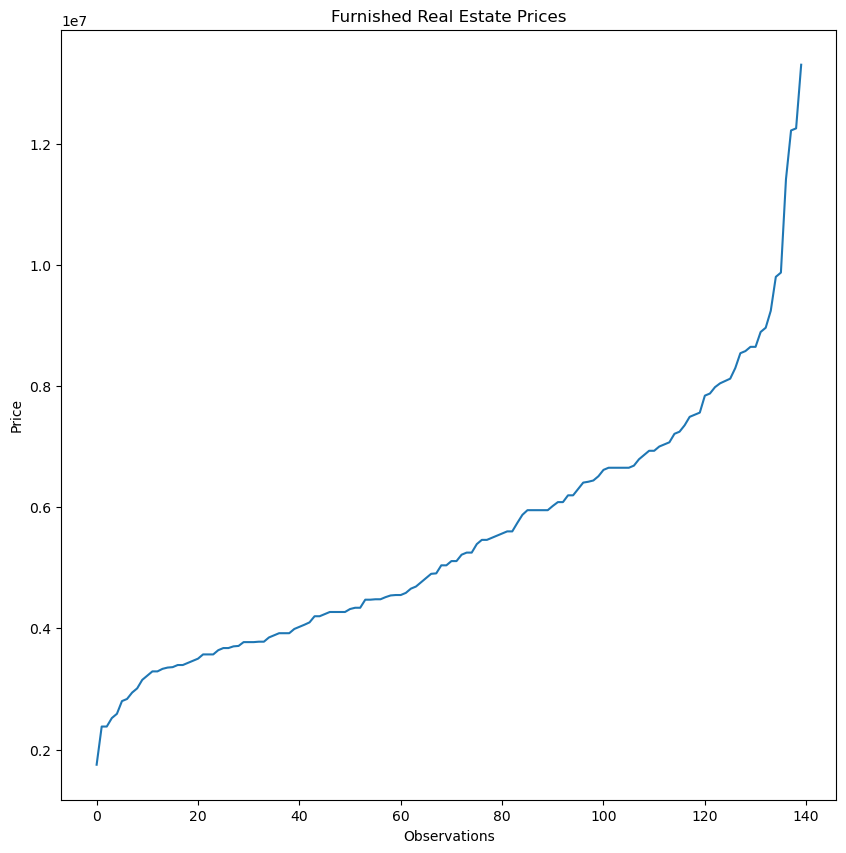

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
plt.plot(furnished['price'].sort_values().values)
plt.xlabel('Observations')
plt.ylabel('Price')
plt.title('Furnished Real Estate Prices')
plt.show()

Now let's focus on furnished homes. To determine the relationship between the independent variables in the dataset for furnished homes (Multicollinearity). We plot the heatmap of the correlation matrix. 

Text(0.5, 1.0, 'Correlation Matrix of Predictors')

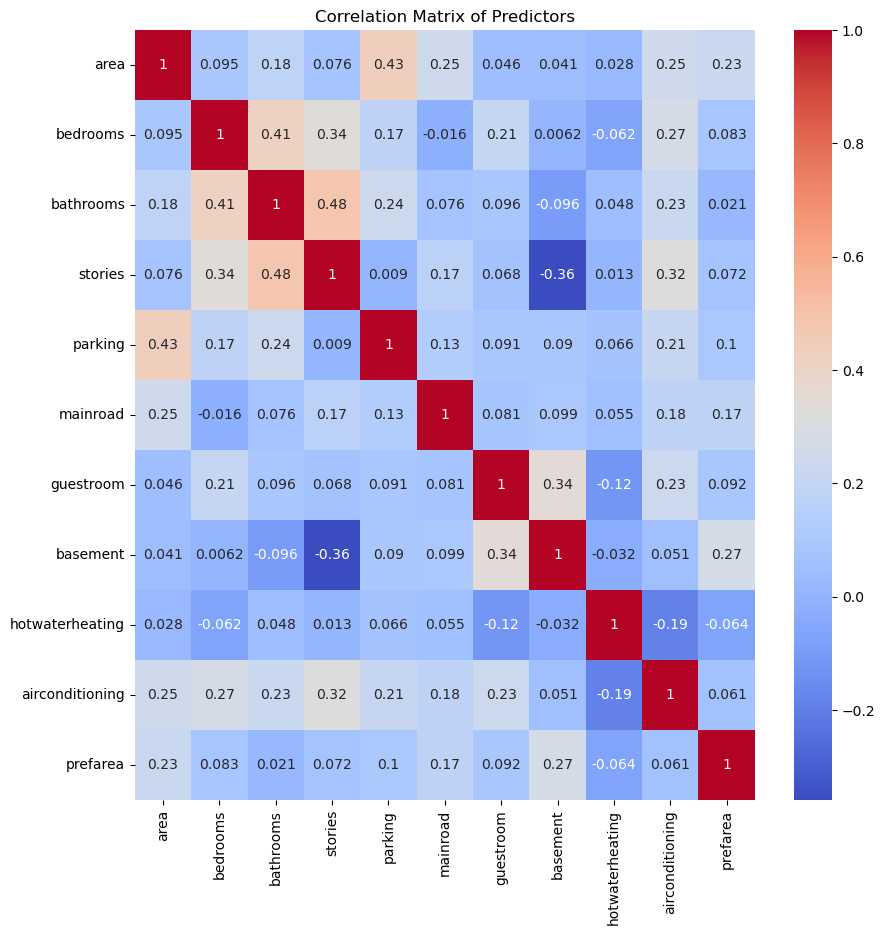

In [23]:
furnished = housing[housing["furnishingstatus"] == "furnished"]
correlation_matrix = furnished[predictors].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(furnished[predictors].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix of Predictors')

In [24]:
import statsmodels.api as sm

furnished = housing[housing["furnishingstatus"] == "furnished"]
predictors = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] + bi_categorical

X = furnished[predictors]
y = furnished['price']

#By adding the constant, you are allowing our model to be flexible and not just centered at the origin. Doing so,
#allows the model to account for baseline effects in housing prices that are not captured by the predictor variables
#alone. 

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     25.39
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           3.93e-27
Time:                        19:02:46   Log-Likelihood:                -2156.4
No. Observations:                 140   AIC:                             4337.
Df Residuals:                     128   BIC:                             4372.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.193e+05   6.28e+05     

Above, we have the following summary of the fitted linear model. Now, Linear Regression can only be applied if the following four assumptions are met. <br>
Now we must test these four assumptions: <br>
1). Linearity <br>
2). Normality <br>
3). Homoscedasticity <br>
4). Independence 

**Test for Independence:** <br>
From the table above, the Durbin Watson Test returns a result of 1.189. Since the above value is less than 2, this suggests positive autocorrelation in which the errors tend to be clustered. The Durbin Watson test rejects independence, but since the data is cross-sectional, there is no need to apply the Durbin-Watson test. The data is cross-sectional because observations were collected in a single point in time and without any explicit time order. Now let's investigate Linearity,  Homoscedasticity, and Normality. 


**Test for Linearity and Homoscedasticity using a Residual Plot:**

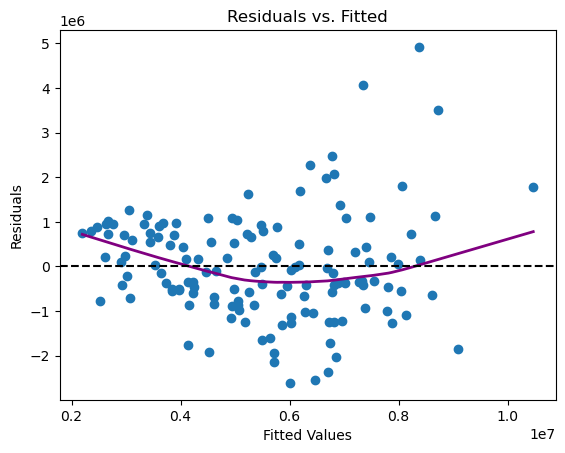

In [28]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

lowess_original = sm.nonparametric.lowess
smooth_original = lowess_original(model.resid, model.fittedvalues)

plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values") 
plt.ylabel("Residuals") 
plt.title("Residuals vs. Fitted")

plt.plot(smooth_original[:, 0], smooth_original[:, 1], color = 'purple', linewidth = 2, label = 'LOWESS Line')

plt.axhline(0, color = 'black', linestyle = '--')
plt.show()

In the following Residuals vs. Fitted graph, the Locally Weighted Scatterplot Smoothing (LOWESS) line is curved indicating non-linear heteroscedasticity (non-constant variance). Already this violates the Linear and Homoscedasticity in Linear Regression. Let's test for Normality. 

**Test for Normality (using Q-Q plot and Shapiro-Wilk Test)**: 

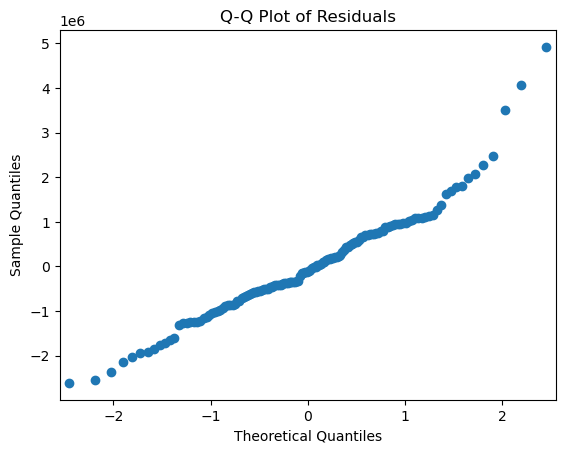

In [31]:
from scipy.stats import shapiro 
import statsmodels.api as sm

#Here we apply the QQ-plot: 
sm.qqplot(model.resid)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [32]:
#Here we apply the Shapiro-Wilk Test: 
stat, p = shapiro(model.resid)
print(f"Shapiro-Wilk W = {stat:}, p-value = {p:}")

Shapiro-Wilk W = 0.9584710018963172, p-value = 0.00030733481520508647


The W statistic is close to 1. <br> The Null Hypothesis $H_{0}$ of the Shapiro-Wilk Test is that the the sample data is normally distributed. <br> The Alternative Hypothesis $H_{1}$ states that the sample data is not normally distributed. <br> At the significance level $a = 0.05$, the p-value of 0.00030733481520508647 is smaller. <br> This means we reject the null hypothesis in favor of the alternative meaning that there is significant evidence that the sample data is not normally distributed. 

**Now we have to apply the Box-Cox Transformation:**

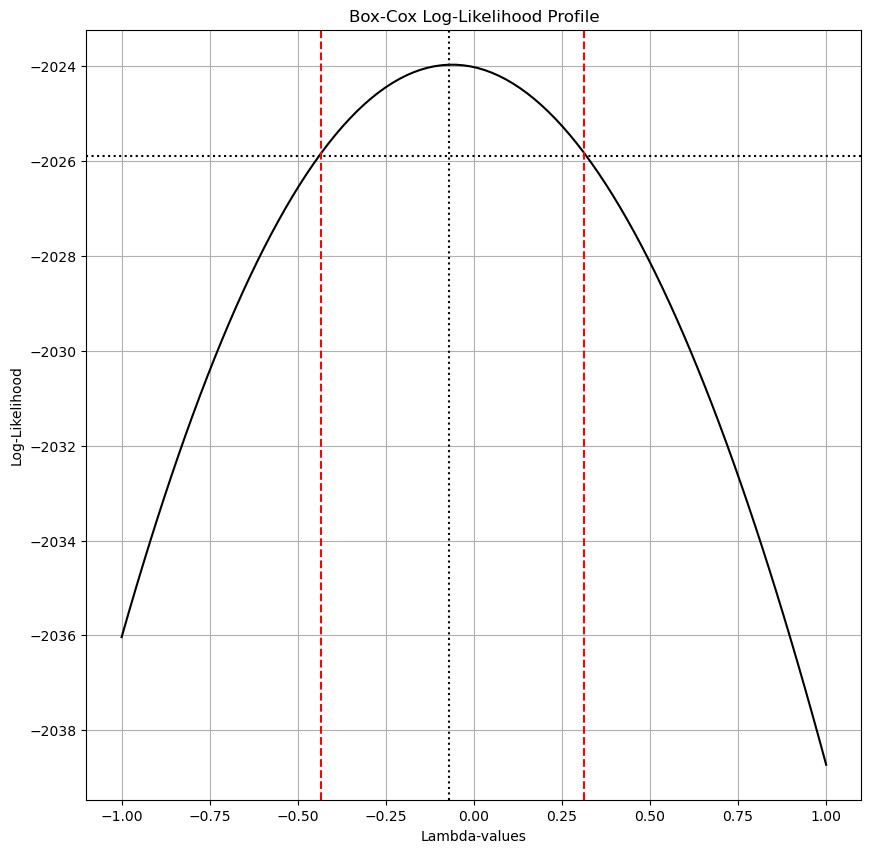

In [34]:
import numpy as np
import matplotlib.pyplot
from scipy import stats

# "Safety-step" to make sure that all y-values are positive as real estate prices cannot be negative. Box-Cox transformation requires 
# requires strictly positive values for the dependent variable (real estate prices). 

y = furnished['price']
y = y[y > 0]

lambdas = np.linspace(-1, 1, 100)
log_likelihoods = [stats.boxcox_llf(lmbda, y) for lmbda in lambdas]

lambda_max = lambdas[np.argmax(log_likelihoods)]
likelihood_max = max(log_likelihoods)

#I used ChatGPT to generate the 95% CI because the original graph did not show the 95% CI. 
threshold = likelihood_max - 0.5 * stats.chi2.ppf(0.95, df=1)
ci_lambdas = lambdas[np.where(log_likelihoods >= threshold)]
ci_lower = ci_lambdas.min()
ci_upper = ci_lambdas.max()


plt.figure(figsize=(10, 10))
plt.plot(lambdas, log_likelihoods, color='black')
plt.axvline(lambda_max, color='black', linestyle=':')
plt.axhline(likelihood_max - 0.5 * stats.chi2.ppf(0.95, df=1), color='black', linestyle=':')
plt.axvline(ci_lower, color='red', linestyle='--', label='95% CI Lower')
plt.axvline(ci_upper, color='red', linestyle='--', label='95% CI Upper')
plt.title("Box-Cox Log-Likelihood Profile")
plt.xlabel("Lambda-values")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.show()

In [35]:
#Extract Optimal Lambda Value
furnished_positive = furnished[furnished['price'] > 0].copy()
original_price = furnished_positive['price']
transformed_price, lambda_opt = stats.boxcox(original_price)
furnished_positive['transformed price'] = transformed_price
print("Optimal Lambda:", lambda_opt)

Optimal Lambda: -0.06181486794079545


From the Box-Cox likelihood profile and the optimal lambda extractor, the optimal lambda is -0.06181486794079545. 

**Transformation:**

In [37]:
furnished['price'].min()

1750000

Observe that the minimum price value in our dataset is 1750000. This means all dependent variable entries are greater than 0. Thus we don't have to apply a shift to make the any of the negative values positive. We can just apply the transformation.  

In [39]:
from scipy.stats import boxcox
furnished['trans_price'] = boxcox(furnished['price'], lmbda = -0.06181486794079545)

X = sm.add_constant(furnished[predictors])
y_trans = furnished['trans_price']
model_trans = sm.OLS(y_trans, X).fit()
print(model_trans.summary())

                            OLS Regression Results                            
Dep. Variable:            trans_price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     30.45
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           1.37e-30
Time:                        19:02:46   Log-Likelihood:                 164.16
No. Observations:                 140   AIC:                            -304.3
Df Residuals:                     128   BIC:                            -269.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.5342      0.040    2

/var/folders/zl/v9fq11313hdbq6l591164v9h0000gn/T/ipykernel_10780/2966216405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnished['trans_price'] = boxcox(furnished['price'], lmbda = -0.06181486794079545)


Now let's retest our Four Assumptions on the Box-Cox transformed model. 

**Independence:** <br>
Since the original data is cross-sectional, independence is likely assumed. 

**Linearity and Homoscedasticity for Box-Cox Transformation:**

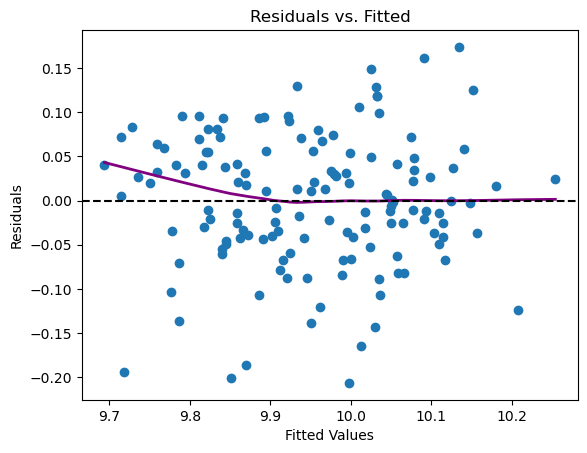

In [42]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

lowess_trans = sm.nonparametric.lowess
smooth_trans = lowess_trans(model_trans.resid, model_trans.fittedvalues)

plt.scatter(model_trans.fittedvalues, model_trans.resid)
plt.xlabel("Fitted Values") 
plt.ylabel("Residuals") 
plt.title("Residuals vs. Fitted")

plt.plot(smooth_trans[:, 0], smooth_trans[:, 1], color = 'purple', linewidth = 2, label = 'LOWESS Line')

plt.axhline(0, color = 'black', linestyle = '--')
plt.show()

In the following Residuals vs. Fitted graph, the Lowess line (purple) appears to be mostly horizontal indicating Linearity and Homoscedasticity are likely met in the transformed model. The Box-Cox transformation has likely improved the fitted model, but let's check for  nonlinearity or heteroscedasticity in individual variables. 

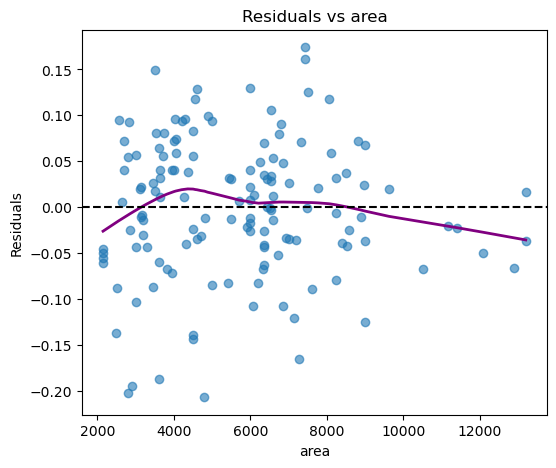

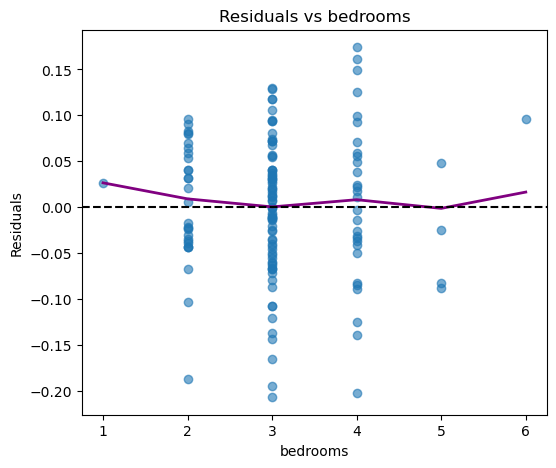

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


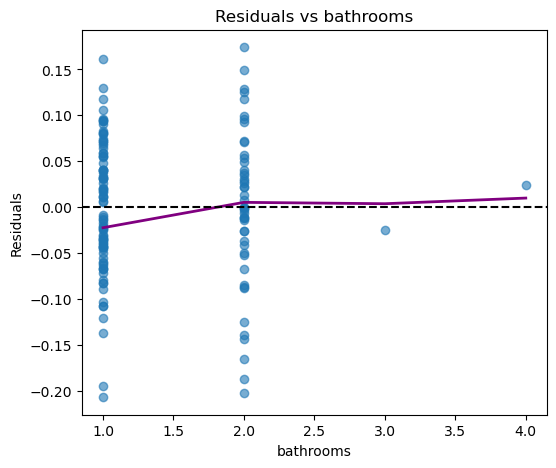

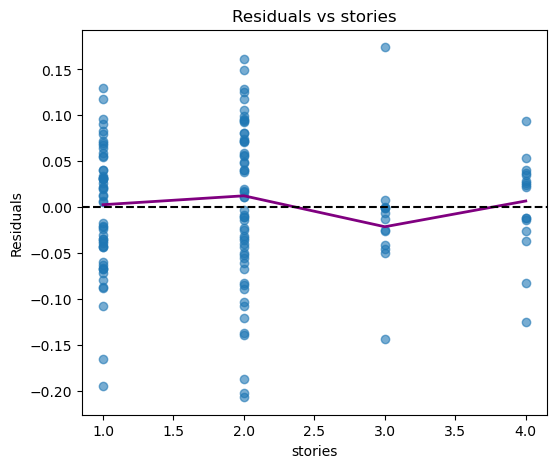

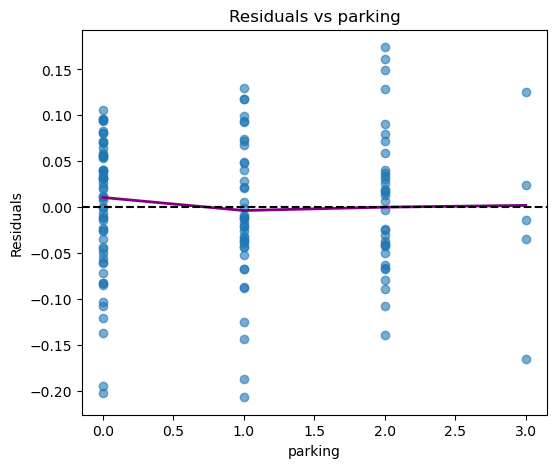

In [44]:
#Testing the quantitative variables
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

quant_predictors = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
trans_y = model_trans.resid

for quant in quant_predictors:
    x = furnished[quant]
    y = trans_y    
    lowess_quant = sm.nonparametric.lowess(y, x, frac = 0.6)

    plt.figure(figsize=(6, 5))
    plt.scatter(x, y, alpha = 0.6)
    plt.plot(lowess_quant[:, 0], lowess_quant[:, 1], color = 'purple', linewidth = 2, label = 'LOWESS Line')
    plt.axhline(0, color = 'black', linestyle = '--')
    plt.title(f'Residuals vs {quant}')
    plt.xlabel(quant)
    plt.ylabel("Residuals")
    plt.show()

Observe that the Lowess line appears to be approximately straight indicating visual evidence that high likelihood that linearity and homoscedasticity have been achieved for the quantitative predictors. An error appears, when executing the LOWESS smoothing function but it did not impact the plotted output. The LOWESS line was still drawn indicating that the warning is non-critical.   

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


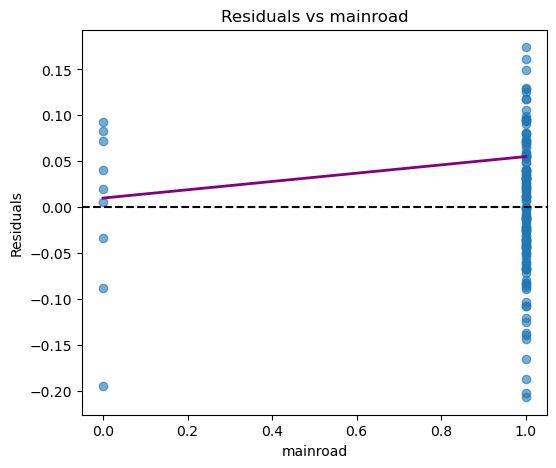

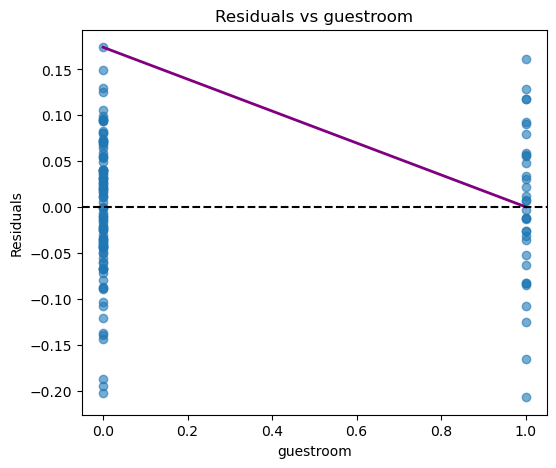

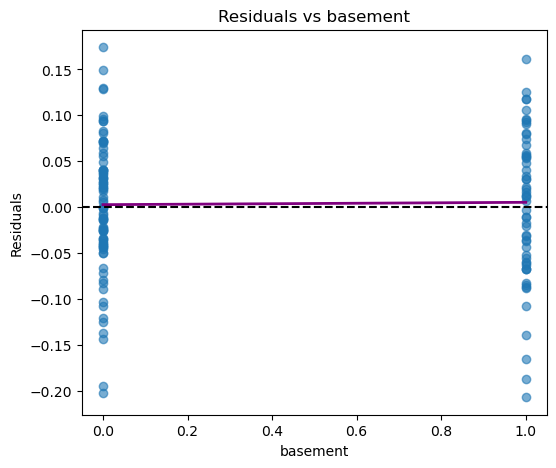

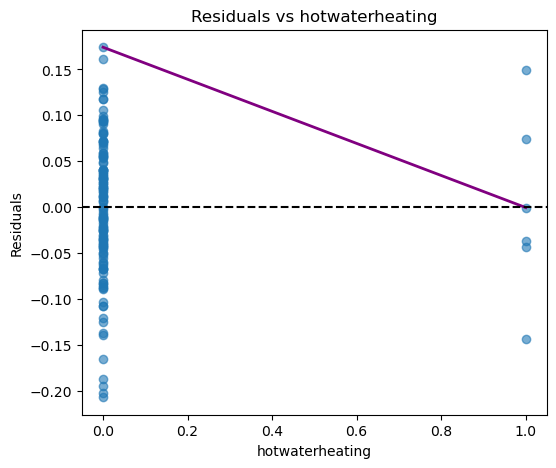

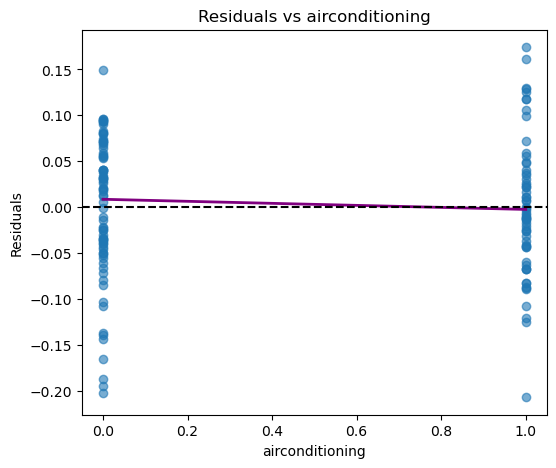

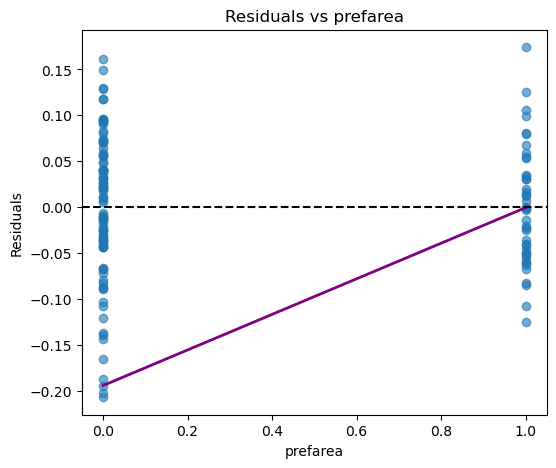

In [46]:
bi_categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
categrorical_y_trans = model_trans.resid

for bi in bi_categorical:
    x = furnished[bi]
    y = categrorical_y_trans 

    
    lowess_categorical = sm.nonparametric.lowess(y, x, frac=0.6)

    plt.figure(figsize=(6, 5))
    plt.scatter(x, y, alpha = 0.6)
    plt.plot(lowess_categorical[:, 0], lowess_categorical[:, 1], color = 'purple', linewidth = 2, label = 'LOWESS Line')
    plt.axhline(0, color = 'black', linestyle = '--')
    plt.title(f'Residuals vs {bi}')
    plt.xlabel(bi)
    plt.ylabel("Residuals")
    plt.show()

In the categorical boxplot, there appears to be a slanted line for the guestroom, basement, and hotwaterheating while the other variable appears to be a flat line. Although boxplots don't reveal anything about linearity, boxplots reveal variation in a dataset through the interquartile range (IQR) and the overall range of the data.   

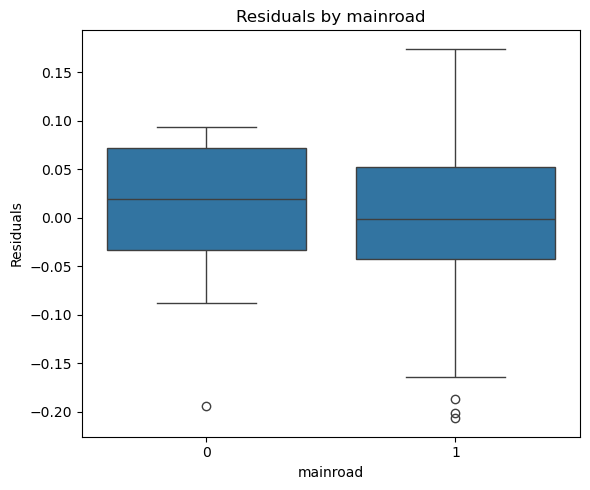

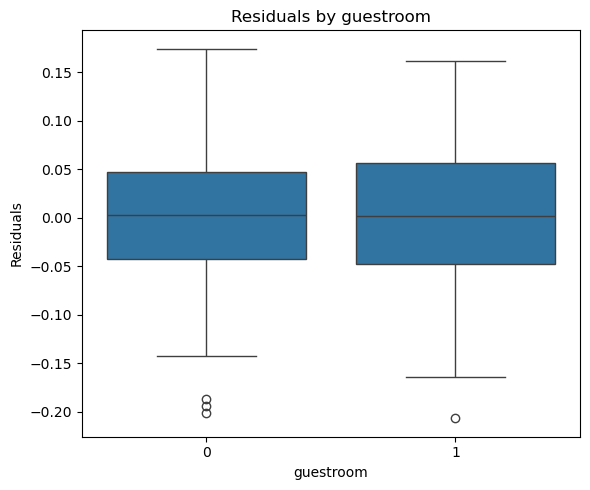

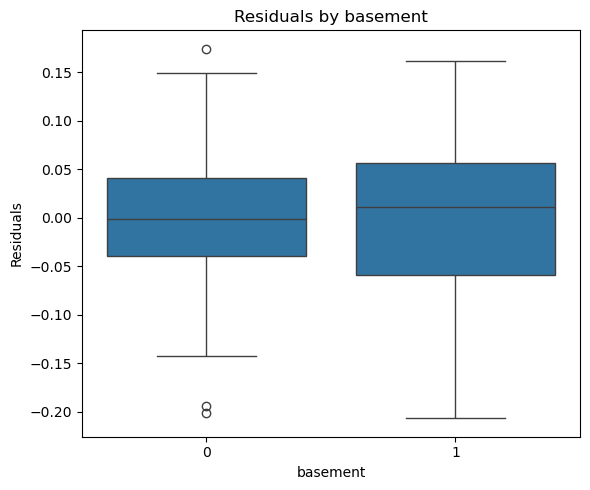

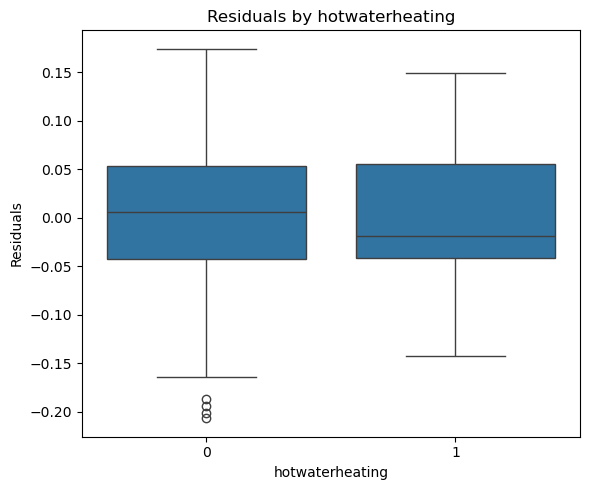

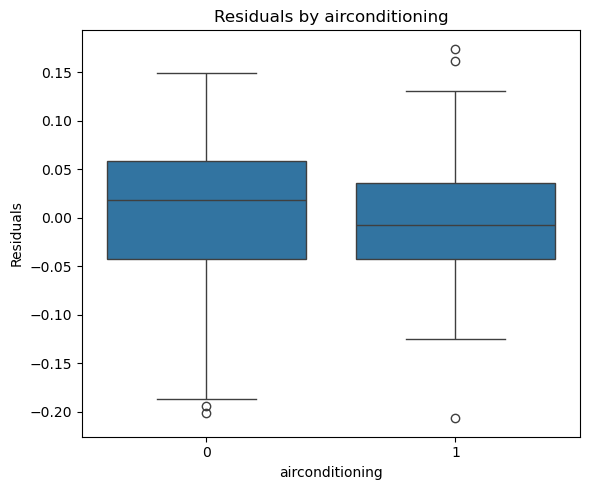

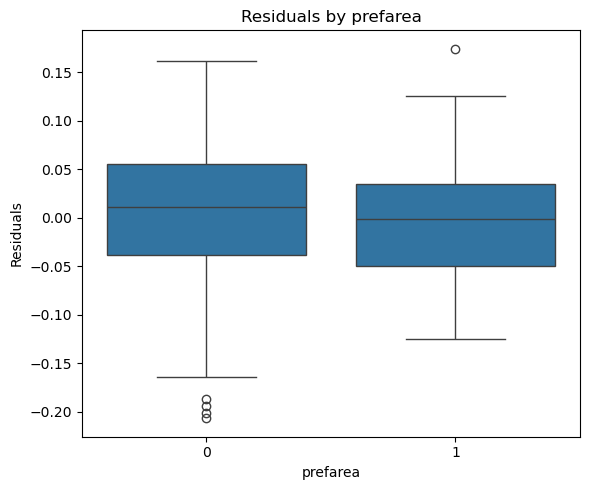

In [48]:
bi_categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
categrorical_y_trans = model_trans.resid

for bi in bi_categorical: 
    plt.figure(figsize=(6, 5))
    sns.boxplot(x=furnished[bi], y=categrorical_y_trans)
    plt.title(f"Residuals by {bi}")
    plt.xlabel(bi)
    plt.ylabel("Residuals")
    plt.tight_layout()
    plt.show()    

- Homoscedasticity likely satisfied in Mainroad, Airconditioning, and preferred area.  <br>
- Mild heteroscedasticity in basement and guestroom, but some vertical asymmetry in hot water heating (indicating skewness). 

In [50]:
#ChatGPT helped generated the Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

bi_categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Create dummy-encoded binary variables (if not already 0/1)
X_bi = pd.get_dummies(furnished[bi_categorical], drop_first=True)

# Add constant term
X_bi = sm.add_constant(X_bi)

# Use transformed price as dependent variable
y_trans_price = model_trans.model.endog

# Fit model with only binary categorical predictors
model_bi = sm.OLS(y_trans_price, X_bi).fit()

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model_bi.resid, model_bi.model.exog)
bp_stat, bp_pvalue, _, _ = bp_test

print(f"Breusch-Pagan test statistic: {bp_stat:.4f}")
print(f"p-value: {bp_pvalue:.4f}")

Breusch-Pagan test statistic: 3.6466
p-value: 0.7244


$H_{0}$ = Homoscedasticity (constant variance of residuals) <br>
$H_{1}$ = Heteroscedasticity (non-constant variance) <br>
The p-value of 0.7244. At the $a$ = 0.05, we fail to reject the null hypothesis. We fail to reject $H_{0}$ indicating evidence of mild heteroscedasticity, but not strong enough to conclude that homoscedasticity is violated. Thus linearity and homoscedasticity are satisfied for individual predictors. 

Now let's test for Normality using the Shapiro-Wilk Test and Q-Q Plots. 

**Normality (Shapiro-Wilk Test and Q-Q Plots for Box-Cox Transformation)**: 

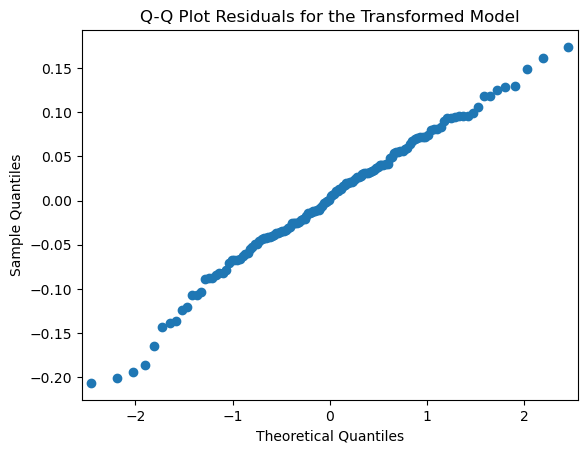

In [52]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(model_trans.resid)
plt.title("Q-Q Plot Residuals for the Transformed Model")
plt.show()

Here the line appears to be straight, but if Normality is truly satisfied let's apply the Shapiro-Wilk test. 

In [54]:
from scipy.stats import shapiro
stat, p = shapiro(model_trans.resid)
print(f"Shapiro-Wilk W = {stat:}, p-value = {p:}")

Shapiro-Wilk W = 0.9873654527895017, p-value = 0.2305257818219976


The W value of the Shapiro-Wilk test is close to 1. <br>
$H_{0}$ = sample data comes from a normally distributed population <br>
$H_{1}$ = sample data does not come from a normally distributed population <br>
At the $a$ = 0.05 level, we fail to reject the null hypothesis means our model is still linear. 

It is evidently clear that Linear, Homoscedasticity, Independence, and Normality were all achieved in Box-Cox transformation. We meet the 4 assumptions for Linear Regression. 

VIF Test for Box-Cox: 

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

predictors = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] + bi_categorical
X = sm.add_constant(furnished[predictors])
bc_vif_data = pd.DataFrame()
bc_vif_data["feature"] = X.columns
bc_vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(bc_vif_data)

            feature        VIF
0             const  36.117320
1              area   1.385469
2          bedrooms   1.347656
3         bathrooms   1.536484
4           stories   1.873868
5           parking   1.339458
6          mainroad   1.156821
7         guestroom   1.259672
8          basement   1.560968
9   hotwaterheating   1.085137
10  airconditioning   1.364064
11         prefarea   1.204246


From VIF, multicollinearity is not a problem in the Box-Cox transformation model. 

Let's consider Cook's Distance to determine if there are any influential points in the model. Let's also determine if there are any outliers as well. 

In [59]:
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(model_trans)
cooks_distance = influence.cooks_distance[0]

#Here we determine the influential points
influential_points = cooks_distance > 4 / len(furnished)
print("Number of influential points:", influential_points.sum())

Number of influential points: 11


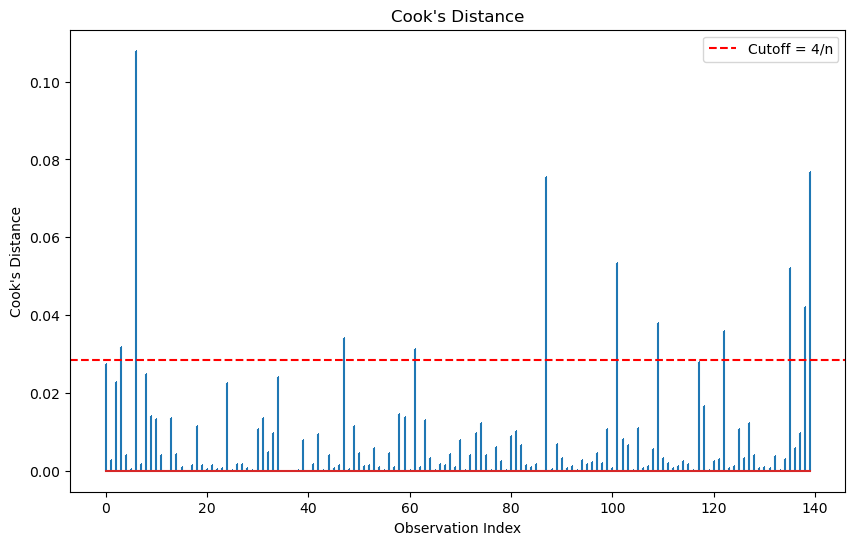

Influential observation indices: [  3   6  47  61  87 101 109 122 135 138 139]


In [60]:
#Cooks Distance Visualizer - ChatGPT helped generate the graph
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_distance)), cooks_distance, markerfmt=",")
plt.axhline(4 / len(X), color='red', linestyle='--', label='Cutoff = 4/n')
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

influential = np.where(cooks_distance > 4 / len(X))[0]
print("Influential observation indices:", influential)

From here, we can determine that there are a few amount of leverage points (11). However, Linearity, Homoscedasticity, Independence, and Normality. 

Let's see check the distribution. 

<Axes: xlabel='price', ylabel='Count'>

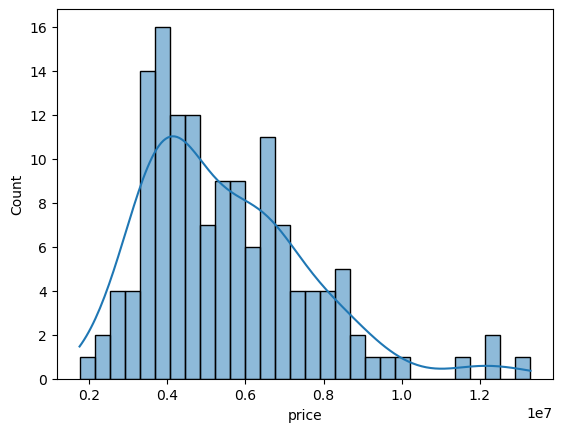

In [62]:
sns.histplot(furnished['price'], bins = 30, kde=True)

In [63]:
furnished['price'].skew()

np.float64(1.085452689786174)

The histogram is slightly skewed to the right(skewness value is above 1). Likely from hotwaterheating due to asymmetric spread in boxplot (see Box-Cox transformation section). 

Log transformation would be helpful for right skewed data because it makes the data more symmetric and closer to a normal distribution. 

/var/folders/zl/v9fq11313hdbq6l591164v9h0000gn/T/ipykernel_10780/2082571182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnished['log_price'] = np.log(furnished['price'])


np.float64(0.06427693448109215)

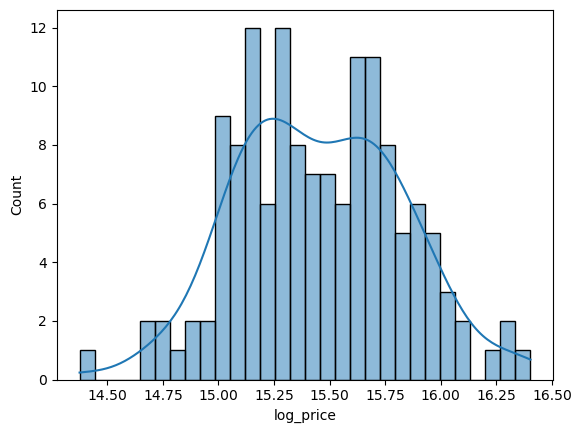

In [65]:
furnished['log_price'] = np.log(furnished['price'])
sns.histplot(furnished['log_price'], bins = 30, kde=True)
furnished['log_price'].skew()  

The histogram appears to be more normal (with a skewness value of 0.14). Thus, Normality is achieved using log transformation. 

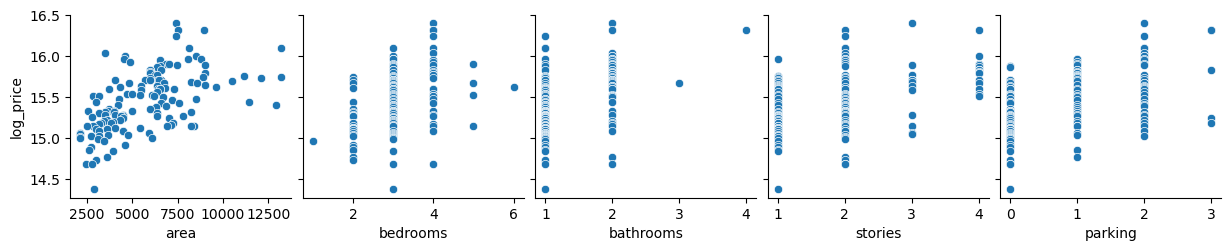

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(furnished, y_vars = 'log_price', x_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'])

**Scatterplot comments:**  <br>
- The scatter between area and log_price exhibits a clear positive trend, suggesting a linear relationship is now better captured after the log transformation.

- For categorical or discrete variables like bedrooms, bathrooms, stories, and parking, the log transformation has reduced the vertical spread of log_price within each group, leading to tighter clusters and less skewed variance.
 
- Overall, the log transformation helped stabilize variance and improved linearity in the continuous relationships (e.g., with area), which is beneficial for meeting linear regression assumptions.



**Performing the log transformation:**

In [69]:
import numpy as np
furnished['log_price'] = np.log(furnished['price'])

predictors = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] + bi_categorical

X = sm.add_constant(furnished[predictors]) 
log_y_trans = furnished['log_price']
log_model_trans = sm.OLS(log_y_trans, X).fit()
print(log_model_trans.summary())

#Log transformation
import numpy as np
furnished['log_price'] = np.log(furnished['price'])

predictors = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] + bi_categorical

X = sm.add_constant(furnished[predictors]) 
log_y_trans = furnished['log_price']
log_model_trans = sm.OLS(log_y_trans, X).fit()
print(log_model_trans.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     30.54
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           1.21e-30
Time:                        19:02:48   Log-Likelihood:                 30.538
No. Observations:                 140   AIC:                            -37.08
Df Residuals:                     128   BIC:                            -1.777
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              14.3710      0.103    1

/var/folders/zl/v9fq11313hdbq6l591164v9h0000gn/T/ipykernel_10780/9202465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnished['log_price'] = np.log(furnished['price'])
/var/folders/zl/v9fq11313hdbq6l591164v9h0000gn/T/ipykernel_10780/9202465.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnished['log_price'] = np.log(furnished['price'])


**Independence:** <br>
Since the data is cross-sectional (by earlier argument), the model is independent.  

Let's determine if there are outliers in the model. 

In [71]:
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(log_model_trans)
cooks_distance = influence.cooks_distance[0]

#Here we determine the influential points
influential_points = cooks_distance > 4 / len(furnished)
print("Number of influential points:", influential_points.sum())

Number of influential points: 12


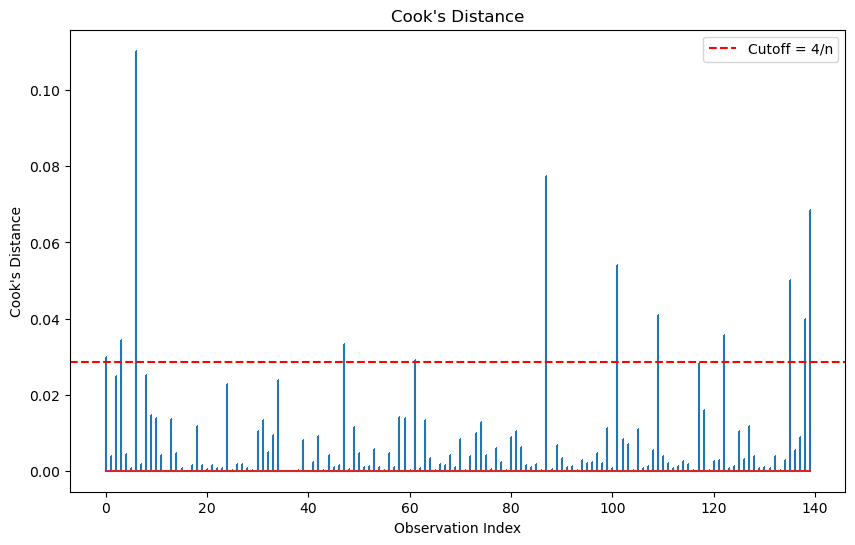

Influential observation indices: [  0   3   6  47  61  87 101 109 122 135 138 139]


In [72]:
#Cooks Distance Log Visualizer - ChatGPT helped generate the graph
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_distance)), cooks_distance, markerfmt=",")
plt.axhline(4 / len(X), color='red', linestyle='--', label='Cutoff = 4/n')
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

influential = np.where(cooks_distance > 4 / len(X))[0]
print("Influential observation indices:", influential)

In [73]:
log_model_trans_RLM = sm.RLM(log_y_trans, X).fit()
print(log_model_trans_RLM.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:              log_price   No. Observations:                  140
Model:                            RLM   Df Residuals:                      128
Method:                          IRLS   Df Model:                           11
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Jun 2025                                         
Time:                        19:02:48                                         
No. Iterations:                    23                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              14.4072      0.098    1

Perform White's Test just to see determine heteroscedasticity in the model. 

In [75]:
#white's test for heteroscedasticity 
from statsmodels.stats.diagnostic import het_white

# Get residuals and exogenous variables
residuals = log_model_trans_RLM.resid
exog = log_model_trans_RLM.model.exog

# White's test
white_test = het_white(residuals, exog)
labels = ["Test Statistic", "Test p-value", "F-Statistic", "F-test p-value"]
print(dict(zip(labels, white_test)))

{'Test Statistic': np.float64(68.63297407736), 'Test p-value': np.float64(0.2923232452609214), 'F-Statistic': np.float64(1.1601342880303975), 'F-test p-value': np.float64(0.26668131892590063)}


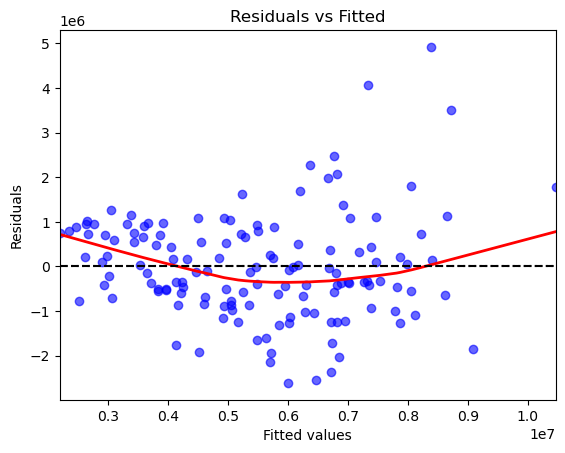

In [76]:
import statsmodels.api as sm

# Model creation
log_model_trans_RLM = sm.RLM(log_y_trans, X).fit()

# Residuals and fitted values 
residuals = model.resid
fitted = model.fittedvalues

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.residplot(
    x=fitted,
    y=residuals,
    lowess=True,
    scatter_kws={'color': 'blue', 'alpha': 0.6},
    line_kws={'color': 'red', 'linewidth': 2})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.axhline(0, linestyle='--', color='black')
plt.show()

When White's test rejects homoscedasticity. From the residual graph the LOWESS line appears to draw a "u-shaped" curve meaning that the Linearity and Homoscedasticity are not sufficiently satisfied. 

Now we check for multicollinearity using VIF (Variance Inflation Factor).

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

predictors = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] + bi_categorical
X = sm.add_constant(furnished[predictors])

log_vif_data = pd.DataFrame()
log_vif_data["feature"] = X.columns
log_vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(log_vif_data)

            feature        VIF
0             const  36.117320
1              area   1.385469
2          bedrooms   1.347656
3         bathrooms   1.536484
4           stories   1.873868
5           parking   1.339458
6          mainroad   1.156821
7         guestroom   1.259672
8          basement   1.560968
9   hotwaterheating   1.085137
10  airconditioning   1.364064
11         prefarea   1.204246


From VIF, multicollinearity is not a problem in the log transformation model. 

Recall that Independence is assumed since the original data is cross-sectional. 

**Which is the best model for Linear Regression?** <br>
Independence, Linearity, Homoscedasticity, and Normality all hold in the Box-Cox model . However, while the log transformation normalizes the original model, it does not meet the assumed conditions of Linearity and Homoscedasticity.

**Generate Heatmap of Box-Cox Transformation**: 

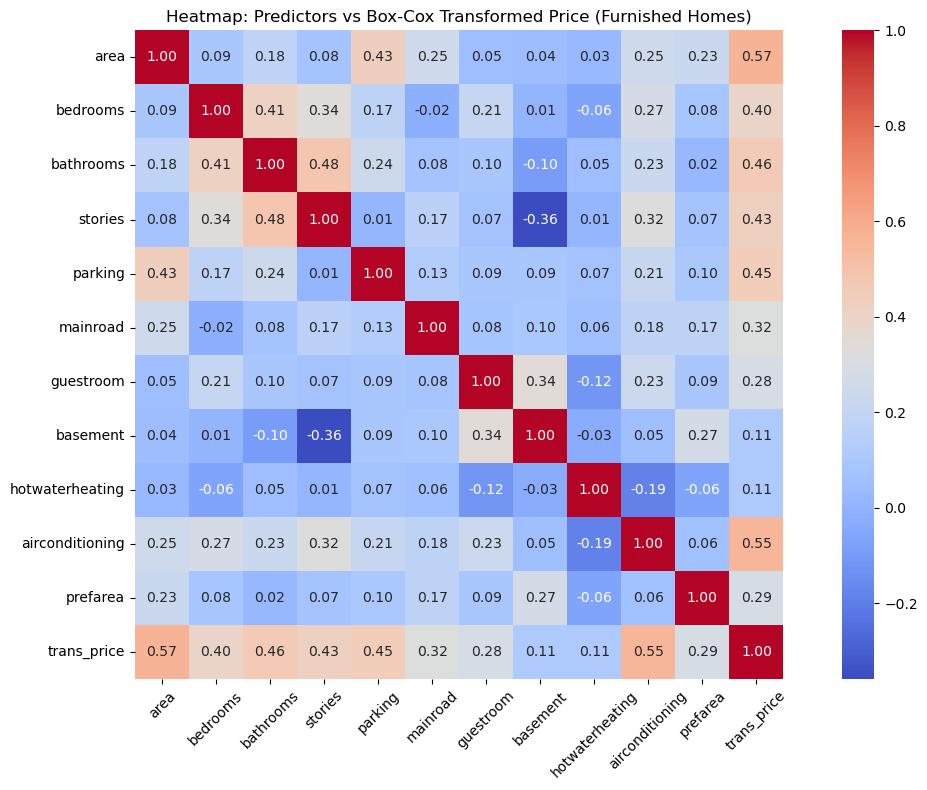

In [80]:
#Reapply the Box-Cox Transformation
furnished = furnished[furnished['price'] > 0].copy()
furnished['trans_price'] = boxcox(furnished['price'], lmbda = -0.06181486794079545)

#Generated Heatmap
predictors = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] + bi_categorical 
features = predictors + ['trans_price']

bc_corr_matrix = furnished[features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(bc_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Heatmap: Predictors vs Box-Cox Transformed Price (Furnished Homes)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Hypothesis 1:** <br>
Test whether the area of a house significantly influences its sale prices <br>
$H_{0}$: The area of a house does not affect the price. <br>
$H_{1}$: The area of a house significantly affects the price. <br>

In [82]:
import statsmodels.api as sm

# Define predictors (no interaction)
predictors_h1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] + bi_categorical
X1 = sm.add_constant(furnished[predictors_h1])
model1 = sm.OLS(y_trans, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            trans_price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     30.45
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           1.37e-30
Time:                        19:02:49   Log-Likelihood:                 164.16
No. Observations:                 140   AIC:                            -304.3
Df Residuals:                     128   BIC:                            -269.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.5342      0.040    2

Conclusion: <br> 
- Reject $H_{0}$.
- Area has a statistically significant effect on housing price.

**Hypothesis 2:** <br>
Test the effect of area on price depending on how many bedrooms a house has (effect of area)  <br>
$H_{0}$: There is no interaction between the area and the number of bedrooms. <br>
$H_{1}$: The effect of area on price varies depending on the number of bedrooms. <br>

In [85]:
# Create interaction term
furnished['area_bedrooms'] = furnished['area'] * furnished['bedrooms']

# Define predictors (with interaction)
predictors_h2 = predictors_h1 + ['area_bedrooms']
X2 = sm.add_constant(furnished[predictors_h2])
model2 = sm.OLS(y_trans, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            trans_price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     27.71
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           7.58e-30
Time:                        19:02:49   Log-Likelihood:                 164.18
No. Observations:                 140   AIC:                            -302.4
Df Residuals:                     127   BIC:                            -264.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.5481      0.075    1

In [86]:
print("Model 1 AIC:", model1.aic)
print("Model 1 BIC:", model1.bic)
print("Model 2 AIC:", model2.aic)
print("Model 2 BIC:", model2.bic)

# ANOVA comparison
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model1, model2)
print(anova_results)

Model 1 AIC: -304.3148575105695
Model 1 BIC: -269.0151484392578
Model 2 AIC: -302.3673203160678
Model 2 BIC: -264.12596882214683
   df_resid       ssr  df_diff   ss_diff       F    Pr(>F)
0     128.0  0.785574      0.0       NaN     NaN       NaN
1     127.0  0.785280      1.0  0.000294  0.0476  0.827643


Conclusion: 
- Fail to reject $H_{0}$.
- The interaction is not statistically significant, and the model fit worsens slightly.
- Thus, the simpler model (without interaction) is preferred. 

**ElasticNetCV:**

In [89]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = furnished[predictors_h2]  # Use predictors with interaction term
y_trans = furnished['trans_price']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=0.2, random_state=42)

#Standardize predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Fit ElasticNet with cross-validation
enet = ElasticNetCV(cv=5, random_state=0, max_iter=10000)
enet.fit(X_train_scaled, y_train)

#Predict and compute RMSE
enet_preds = enet.predict(X_test_scaled)
enet_rmse = np.sqrt(mean_squared_error(y_test, enet_preds))

print("ElasticNet Test RMSE:", enet_rmse)

ElasticNet Test RMSE: 0.07656420788495645


**OLS Model:**

In [91]:
X_test_const = sm.add_constant(X_test)
ols_preds = model2.predict(X_test_const)
ols_rmse = np.sqrt(mean_squared_error(y_test, ols_preds))

print("OLS Test RMSE:", ols_rmse)

OLS Test RMSE: 0.06993601191245717


**Compare ElasticNet Test RMSE and OLS Test RMSE:**

In [93]:
import pandas as pd

summary = pd.DataFrame({'Model': ['OLS (Interaction)', 'ElasticNet'], 'RMSE': [ols_rmse, enet_rmse]})

print(summary)

               Model      RMSE
0  OLS (Interaction)  0.069936
1         ElasticNet  0.076564


Conclusion: <br> 
ElasticNetCV does not improve performance. In other words, the OLS model generalizes better on the test set and likely due to multicollinearity being low (see VIF test for Box-Cox). 

**Best Model:** <br>
- Box-Cox OLS model without interaction (area x bedroom). 
- All assumptions of Linear Regression were satisfied and BIC/AIC were satisfied from the Box-Cox transformation and OLS performed better than ElasticNet Test. 

In [95]:
#Preferred Model Values

predictors = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] + bi_categorical
X1 = sm.add_constant(furnished[predictors])
model1 = sm.OLS(y_trans, X1).fit()

X1_test = X_test[predictors]  
X1_test_const = sm.add_constant(X1_test)

# Predict
ols_preds1 = model1.predict(X1_test_const)

# RMSE
ols_rmse1 = np.sqrt(mean_squared_error(y_test, ols_preds1))

print("OLS (No Interaction) RMSE:", ols_rmse1)
print("R-squared:", model1.rsquared)
print("Adjusted R-squared:", model1.rsquared_adj)

OLS (No Interaction) RMSE: 0.07052368598058167
R-squared: 0.7235240454511283
Adjusted R-squared: 0.6997643931070846
